In [20]:
import pandas as pd
import numpy as np
import string
import re

import psalm_scraper

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer        # module for stemming

In [2]:
first = 1
last = 150

#get corpus
ps_dict = psalm_scraper.create_ps_dict(first_psalm = first, last_psalm = last, verbose = False)

In [85]:
def process_psalm(psalm, punc_list, stopwords_english, stemmer):
    
    #Get punctuation list and stop words to remove from corpus
    punc_list = string.punctuation + '“' + '”' + '—'
    stopwords_english = stopwords.words('english') 
    
    # Instantiate stemming class
    stemmer = PorterStemmer() 
    
    tmp_ps = psalm.translate(str.maketrans('', '', punc_list)) #get psalm and remove punctuation
    ps = np.array(tmp_ps.lower().split(' ')) #force everything to lower case and split string.

    #removing stopwords
    clean_ps = []
    [clean_ps.append(j) for j in ps if j not in stopwords_english] #create array of tokenized words and eliminate stop words

    #stemming cleaned psalm
    ps_stem = []
    for word in clean_ps:
        stem_word = stemmer.stem(word)  # stemming word
        ps_stem.append(stem_word)
    
    if '' in ps_stem: ps_stem.remove('')
    return ps_stem

In [81]:
#Create vocabulary if desired
def create_raw_vocab(ps_dict):

    vocab = []
    for i in range(first, last+1):

        punc_list = string.punctuation + '“' + '”' + '—'

        tmp_ps = ps_dict[i].translate(str.maketrans('', '', punc_list)) #get psalm and remove punctuation
        ps = np.array(tmp_ps.lower().split(' ')) #split string and force to lower case. then create array of words from psalm to add to vocabulary
        [vocab.append(j) for j in ps if j not in vocab] #list comprehension to build vocabulary
    
    vocab.remove('')
    return vocab

In [89]:
#create clean corpus if desired
def clean_corpus(ps_dict, first=1, last=150):

    corpus = {}

    for i in range(first, last+1):
        ps_stem = process_psalm(ps_dict[i])

        corpus[i] = ps_stem
        
    return corpus

In [83]:
#build frequencies

psalms = list(ps_dict.values())
outcomes_df = pd.read_csv('psalms_sentiment.csv')
outcomes = np.array(outcomes_df['positive'])

In [86]:
def build_freqs(psalm, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, p in zip(yslist, psalm):
        for word in process_psalm(p):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

freqs = build_freqs(psalms, outcomes)
freqs

{('happi', 1): 21,
 ('follow', 1): 5,
 ('advic', 1): 1,
 ('wick', 1): 47,
 ('take', 1): 29,
 ('path', 1): 13,
 ('sinner', 1): 5,
 ('tread', 1): 3,
 ('sit', 1): 14,
 ('seat', 1): 2,
 ('scoffer', 1): 1,
 ('delight', 1): 18,
 ('law', 1): 30,
 ('lord', 1): 561,
 ('medit', 1): 12,
 ('day', 1): 54,
 ('night', 1): 18,
 ('like', 1): 87,
 ('tree', 1): 8,
 ('plant', 1): 7,
 ('stream', 1): 5,
 ('water', 1): 33,
 ('yield', 1): 4,
 ('fruit', 1): 12,
 ('season', 1): 4,
 ('leav', 1): 3,
 ('wither', 1): 4,
 ('prosper', 1): 7,
 ('chaff', 1): 1,
 ('wind', 1): 12,
 ('drive', 1): 2,
 ('away', 1): 24,
 ('therefor', 1): 15,
 ('stand', 1): 20,
 ('judgment', 1): 19,
 ('congreg', 1): 5,
 ('righteou', 1): 41,
 ('watch', 1): 12,
 ('way', 1): 49,
 ('perish', 1): 10,
 ('nation', 0): 20,
 ('conspir', 0): 2,
 ('peopl', 0): 50,
 ('plot', 0): 9,
 ('vain', 0): 5,
 ('king', 0): 9,
 ('earth', 0): 25,
 ('set', 0): 25,
 ('ruler', 0): 2,
 ('take', 0): 24,
 ('counsel', 0): 3,
 ('togeth', 0): 6,
 ('lord', 0): 226,
 ('anoint',

In [91]:
len(freqs)

3177

In [98]:
keys = ['pleasur', 'faith', 'might', 'tongu', 'judg', 'heaven', 'heart', 
        'righteou', 'sheol', 'steadfast', 'let', 'deliv', 'knowledg', 'israel', 'heart']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['pleasur', 6, 1],
 ['faith', 39, 32],
 ['might', 14, 8],
 ['tongu', 11, 22],
 ['judg', 15, 7],
 ['heaven', 52, 20],
 ['heart', 70, 63],
 ['righteou', 41, 25],
 ['sheol', 7, 9],
 ['steadfast', 90, 37],
 ['let', 135, 108],
 ['deliv', 29, 28],
 ['knowledg', 6, 3],
 ['israel', 38, 23],
 ['heart', 70, 63]]

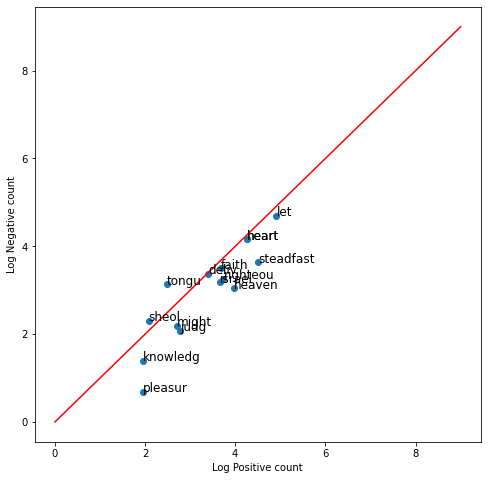

In [99]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()